### Author: Tejaswini Patil
#### Reg No: 20MAI0044
#### Deep Learning CSE6037-Lab1
###### Activity 2 - Implementing Perceptron on online available dataset

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df.head()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.tail()

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Rating
1723,low,low,6,6,med,med,good
1724,low,low,6,6,med,high,vgood
1725,low,low,6,6,big,low,unacc
1726,low,low,6,6,big,med,good
1727,low,low,6,6,big,high,vgood


In [6]:
df['Buying'] = df['Buying'].map({'low':0,'med':1,'high':2,'vhigh':3})
df['Maintainance'] = df['Maintainance'].map({'low':0,'med':1,'high':2,'vhigh':3})
df['Lug_boot'] = df['Lug_boot'].map({'small':0,'med':1,'big':2})
df['Safety'] = df['Safety'].map({'low':0,'med':1,'high':2})
df['Rating'] = df['Rating'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

In [7]:
df

,Buying,Maintainance,Doors,Persons,Lug_boot,Safety,Rating
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,6,6,1,1,2
1724,0,0,6,6,1,2,3
1725,0,0,6,6,2,0,0
1726,0,0,6,6,2,1,2


In [8]:
X = df.drop('Rating',axis=1)
Y = df['Rating']

In [9]:
X.shape

(1728, 6)

In [10]:
Y.shape

(1728,)

In [11]:
# Lets carry out the training and testing split up
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=0.1, random_state=300)

In [12]:
print(X_train1.shape,X_test1.shape,Y_train1.shape,Y_test1.shape)
print(type(X_train1))

(1555, 6) (173, 6) (1555,) (173,)
<class 'pandas.core.frame.DataFrame'>


In [13]:
sc = StandardScaler()
sc.fit(X_train1)

# Apply the scaler to the X training data
X_train1_std = sc.transform(X_train1)

# Apply the SAME scaler to the X test data
X_test1_std = sc.transform(X_test1)

In [14]:
ppn1 = Perceptron(max_iter=100, eta0=0.01, random_state=19)
ppn1.fit(X_train1_std, Y_train1)

Perceptron(eta0=0.01, max_iter=100, random_state=19)

In [15]:
ppn1.fit(X_train1_std,Y_train1)

Perceptron(eta0=0.01, max_iter=100, random_state=19)

In [16]:
y_pred1 = ppn1.predict(X_test1_std)

In [17]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
ppn1.score(X_test1,Y_test1)

0.7052023121387283

In [19]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.2, random_state=117)
print(X_train2.shape,X_test2.shape,Y_train2.shape,Y_test2.shape)
#print(type(X_train))
sc = StandardScaler()
sc.fit(X_train2)
X_train2_std = sc.transform(X_train2)
X_test2_std = sc.transform(X_test2)
ppn2 = Perceptron(max_iter=100, eta0=0.01, random_state=19)
ppn2.fit(X_train2_std, Y_train2)
y_pred2 = ppn2.predict(X_test2_std)
print(y_pred2)
ppn2.score(X_test2,Y_test2)

(1382, 6) (346, 6) (1382,) (346,)
[0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 3 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 3 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 3 0 1 1 1 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 0]


0.4046242774566474

In [20]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y,test_size=0.3, random_state=117)
print(X_train3.shape,X_test3.shape,Y_train3.shape,Y_test3.shape)
#print(type(X_train))
sc = StandardScaler()
sc.fit(X_train3)
X_train3_std = sc.transform(X_train3)
X_test3_std = sc.transform(X_test3)
ppn3 = Perceptron(max_iter=100, eta0=0.01, random_state=19)
ppn3.fit(X_train3_std, Y_train3)
y_pred3 = ppn3.predict(X_test3_std)
print(y_pred3)
ppn3.score(X_test3,Y_test3)

(1209, 6) (519, 6) (1209,) (519,)
[0 0 0 0 0 1 1 2 0 0 2 1 1 0 1 1 0 1 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 2 1 0 0 0 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0 0 0 2 0 1 2 0 0 1 0 1 0 2 0
 0 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 2 3 0 1 1 0 2 0 2 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 2 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 2 0 0 0 1 0 1 1 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 2 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 2 0 1 1 2 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 0 2 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 2 2 0 0 0 0 0 1 0 2 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 2 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 1 0 0 1 0 0

0.24277456647398843

In [21]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X,Y,test_size=0.4, random_state=117)
print(X_train4.shape,X_test4.shape,Y_train4.shape,Y_test4.shape)
#print(type(X_train))
sc = StandardScaler()
sc.fit(X_train4)
X_train4_std = sc.transform(X_train4)
X_test4_std = sc.transform(X_test4)
ppn4 = Perceptron(max_iter=100, eta0=0.01, random_state=19)
ppn4.fit(X_train4_std, Y_train4)
y_pred4 = ppn4.predict(X_test4_std)
print(y_pred4)
ppn4.score(X_test4,Y_test4)

(1036, 6) (692, 6) (1036,) (692,)
[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 2 0 0 0 2 0 1 0 1 0 0 0
 0 2 0 1 0 0 0 0 0 1 1 0 1 2 0 0 0 0 0 0 2 0 1 1 0 1 0 0 1 0 2 0 0 1 0 1 0
 1 0 0 1 0 0 2 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 2 1 0 1 2 0 0 1 0 0 2 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 2 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 2 1 0 0 0 1 0 0 3 0 1 0 0 0 0 2 1 0 1
 1 0 0 0 0 0 1 0 1 0 0 3 1 2 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 2 2 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0
 3 1 0 0 0 2 0 0 0 2 0 1 0 1 0 0 1 0 2 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 1

0.26011560693641617

In [22]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X,Y,test_size=0.5, random_state=117)
print(X_train5.shape,X_test5.shape,Y_train5.shape,Y_test5.shape)
#print(type(X_train))
sc = StandardScaler()
sc.fit(X_train5)
X_train5_std = sc.transform(X_train5)
X_test5_std = sc.transform(X_test5)
ppn5 = Perceptron(max_iter=100, eta0=0.01, random_state=19)
ppn5.fit(X_train5_std, Y_train5)
y_pred5 = ppn5.predict(X_test5_std)
print(y_pred5)
ppn5.score(X_test5,Y_test5)

(864, 6) (864, 6) (864,) (864,)
[1 0 1 0 0 3 0 2 0 1 3 0 1 0 1 3 0 1 1 1 1 1 0 0 3 0 0 0 0 0 1 0 1 1 0 0 2
 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 2 0 0 1 1
 0 2 0 1 0 0 0 2 0 1 0 0 1 1 0 0 0 0 2 0 2 0 1 0 0 1 0 1 2 0 0 1 0 1 0 2 0
 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 2 3 1 0 1 1 0 1 0 2 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 2 0 0 0 1 0 2 1 0 2 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 1 0 0 0 1 0 1 0 2 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 2 0 0 1 2 0 0 0 1 0 1 3 0 1 0 1 0 0 1 0 0 0
 2 1 1 0 1 0 1 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 1 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 1 0 0 0
 0 0 1 0 0 1 0 2 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 2 0 1 1 0 0 0 0 1 0 0 1 3 0
 3 1 0 0 0 1 0 0 1 2 0 2 0 0 0 0 1 0 0 0 1 1 3 0 1 3 1 0 0 3 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 3 1 1 0 1 0 1 0 1 0 0

0.21643518518518517

#### Here the accuracy of the model for different training and testing data sizes is:
####     Training    Testing    Accuracy
####        10%        90%       0.7052
####        20%        80%       0.4046
####        30%        70%       0.2427
####        40%        60%       0.2601
####        50%        50%       0.2164

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

[[115   7   0   0]
 [ 25  15   1   0]
 [  2   2   2   0]
 [  1   2   1   0]]


<AxesSubplot:>

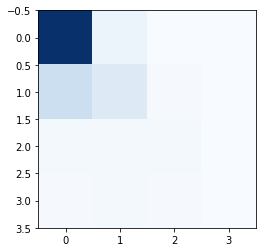

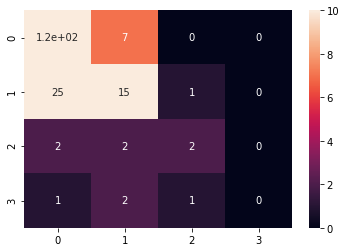

In [24]:
cm1=confusion_matrix(Y_test1,y_pred1)
print(cm1)
plt.imshow(cm1, cmap='Blues')
df_cm1 = pd.DataFrame(cm1)
plt.figure()
sn.heatmap(df_cm1,vmin=0, vmax=10, annot=True)

[[207  38   0   0]
 [ 35  40   0   3]
 [  0  10   0   0]
 [  0  10   0   3]]


<AxesSubplot:>

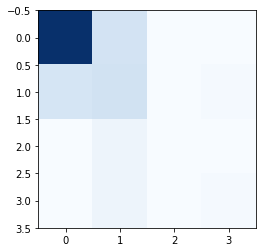

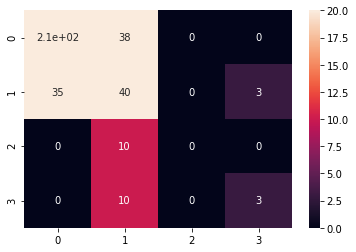

In [25]:
cm2=confusion_matrix(Y_test2,y_pred2)
print(cm2)
plt.imshow(cm2, cmap='Blues')
df_cm2 = pd.DataFrame(cm2)
plt.figure()
sn.heatmap(df_cm2,vmin=0, vmax=20, annot=True)

[[317  40   5   0]
 [ 35  79  11   1]
 [  1   4   9   0]
 [  0   7  10   0]]


<AxesSubplot:>

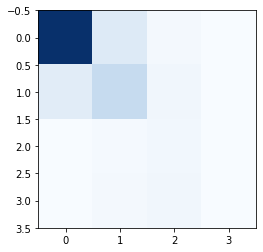

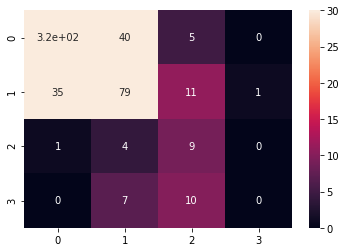

In [26]:
cm3=confusion_matrix(Y_test3,y_pred3)
print(cm3)
plt.imshow(cm3, cmap='Blues')
df_cm3 = pd.DataFrame(cm3)
plt.figure()
sn.heatmap(df_cm3,vmin=0, vmax=30, annot=True)

[[372 101  14   0]
 [ 84  68   3   1]
 [  3  10  11   0]
 [  7  12   0   6]]


<AxesSubplot:>

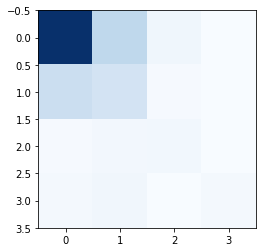

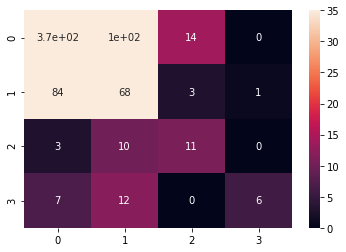

In [27]:
cm4=confusion_matrix(Y_test4,y_pred4)
print(cm4)
plt.imshow(cm4, cmap='Blues')
df_cm4 = pd.DataFrame(cm4)
plt.figure()
sn.heatmap(df_cm4, vmin=0, vmax=35,annot=True)

[[495  95  14   9]
 [ 53 115  15   3]
 [  0  14  16   2]
 [  0  15   6  12]]


<AxesSubplot:>

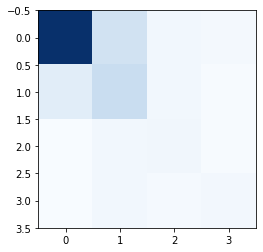

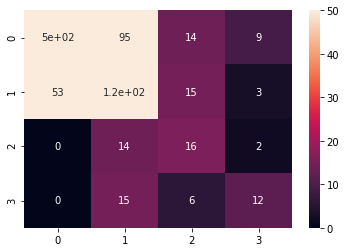

In [28]:
cm5=confusion_matrix(Y_test5,y_pred5)
print(cm5)
plt.imshow(cm5, cmap='Blues')
df_cm5 = pd.DataFrame(cm5)
plt.figure()
sn.heatmap(df_cm5,vmin=0, vmax=50, annot=True)